# Cleaning/Formatting Website Data

## Perform at least 5 data transformation and/or cleansing steps to your website data. For example:
### Replace Headers
### Format data into a more readable format
### Identify outliers and bad data
### Find duplicates
### Fix casing or inconsistent values
### Conduct Fuzzy Matching

## Import Libraries

In [382]:
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Website Data

In [383]:
# Capture the HTML baseball data and payroll from the baseball cube website
url_BB = "http://www.thebaseballcube.com/topics/payrolls/"
list_of_df_BB = pd.read_html(url_BB, header=0)
df_BB = list_of_df_BB[0] 
df_BB.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Payroll,Lowest Payroll,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Replace Headers

In [384]:
# Remove column headers 9-49 as the information is NaN
BB_columns = df_BB.dropna(axis=1)
df_BB_columns = pd.DataFrame(BB_columns)
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Payroll,Lowest Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


In [385]:
# Change "Highest Payroll" and "Lowest Payroll" to "Highest Team Payroll" and "Lowest Team Payroll"
df_BB_columns = df_BB_columns.rename(columns={'Highest Payroll':'Highest Team Payroll', 'Lowest Payroll': 'Lowest Team Payroll'})
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


## Format data into a more readable format

In [386]:
# Remove rows 20 and 33 as they do not contain data
df_BB_columns = df_BB_columns.drop(df_BB_columns.index[[20,33]])
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)","Boston Red Sox ($222,171,123)","Tampa Bay Rays ($60,444,931)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","Boston Red Sox ($235,649,368)","Oakland Athletics ($68,534,631)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","Los Angeles Dodgers ($187,989,811)","San Diego Padres ($34,574,400)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","Los Angeles Dodgers ($253,639,162)","Milwaukee Brewers ($62,964,319)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","Los Angeles Dodgers ($230,352,402)","Arizona Diamondbacks ($65,770,333)"


## Fix casing or inconsistent values

In [387]:
# Split column data: Highest Payroll, Lowest Payroll and Top Salary
df_BB_columns[['Highest Team Name','Highest Team Payroll']] = df_BB_columns['Highest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Lowest Team Name','Lowest Team Payroll']] = df_BB_columns['Lowest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Top Salary Player Name','Top Player Salary']] = df_BB_columns['Top Salary'].str.split("$",expand=True,)
df_BB_columns.head()

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)","222,171,123)","60,444,931)",Boston Red Sox (,Tampa Bay Rays (,Max Scherzer (,"42,142,857)"
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)","235,649,368)","68,534,631)",Boston Red Sox (,Oakland Athletics (,Mike Trout (,"33,250,000)"
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)","187,989,811)","34,574,400)",Los Angeles Dodgers (,San Diego Padres (,Clayton Kershaw (,"33,000,000)"
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)","253,639,162)","62,964,319)",Los Angeles Dodgers (,Milwaukee Brewers (,Clayton Kershaw (,"32,000,000)"
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)","230,352,402)","65,770,333)",Los Angeles Dodgers (,Arizona Diamondbacks (,Clayton Kershaw (,"31,000,000)"


In [388]:
# Clean up column data: remove open and closed parantheses on split columns
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].astype(int)
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].astype(int)
df_BB_columns['Highest Team Name'] = df_BB_columns['Highest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Lowest Team Name'] = df_BB_columns['Lowest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Top Salary Player Name'] = df_BB_columns['Top Salary Player Name'].str.replace(r"[(]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].str.replace(r"[),]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].astype(int)

df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


## Identify outliers and bad data

<AxesSubplot:xlabel='Year'>

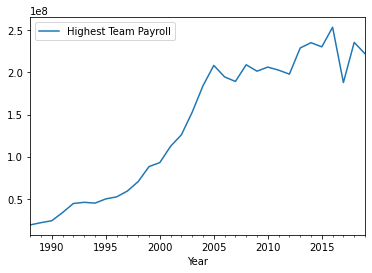

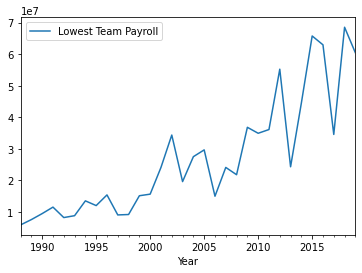

In [389]:
# Identify outliers and bad data visually using a line graph
df_BB_columns.Year = pd.to_datetime(df_BB_columns.Year, format='%Y') # format year column using to_datetime function
df_BB_columns.plot.line(x='Year', y='Highest Team Payroll')
df_BB_columns.plot.line(x='Year', y='Lowest Team Payroll')
# Highest Team Payroll: There are no outliers in the Highest Payroll data
# In 2017 there's a small trough (similar to 2010 values) because the MLB teams had a payroll reduction of 12% due to a labor deal reached 
# between league and players that looked to rationalize the team payrolls to make spending more equal between the teams
# Lowest Team Payroll: There are 2 outliers in the Lowest Team Payroll data in 2013 and 2017
# In 2017 there was the 12% payroll reduction mentioned above
# In 2013, the Houston Astros had a very low payroll because they were the worst team in the league that year (43-86),
# and had slashed payroll expenses by the owner. The owner gutted the team of its most expensive players while building 
# up farm system. No one on the team got paid over a million except for the pitcher, Erik Bedard, at $1.15 million

Text(0.5, 1.0, 'Highest Player Salaries Over Time')

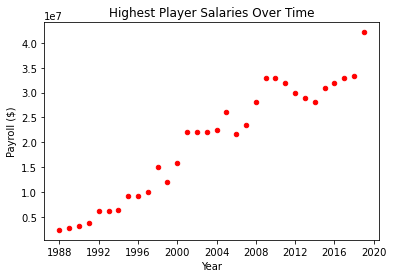

In [390]:
# Identify outliers and bad data visually using a scatterplot
df_BB_columns.plot(kind='scatter', x='Year', y='Top Player Salary', alpha=1, color='red')
plt.xlabel('Year')
plt.ylabel('Payroll ($)')
plt.title('Highest Player Salaries Over Time')
# There is 1 outlier in 2019 which is Tampa Bay Ray player Max Scherzer's salary of $42,142,857/year

Text(0.5, 1.0, 'Total MLB Player Count Over Time')

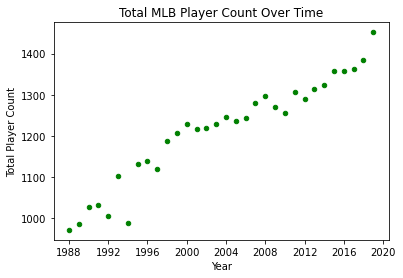

In [391]:
# Identify outliers and bad data visually using a scatterplot
df_BB_columns['Player Count'] = df_BB_columns['Player Count'].astype(int) # Change Player Count to integer
df_BB_columns.Year = pd.to_datetime(df_BB_columns.Year, format='%Y') # format year column using to_datetime function

df_BB_columns.plot(kind='scatter', x='Year', y='Player Count', alpha=1, color='green')
plt.xlabel('Year')
plt.ylabel('Total Player Count')
plt.title('Total MLB Player Count Over Time')
# There is one smaller outlier in Player Count in 1994 where the league lost 13 players due to the '94 MLB players strike
# which lasted 232 days and canceled more than 900 MLB games including the World Series

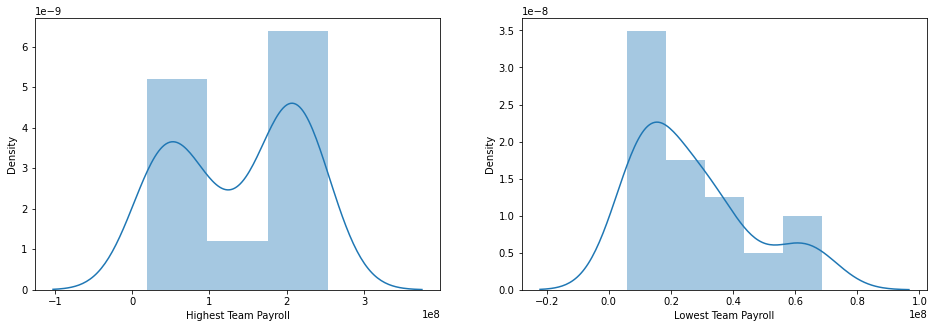

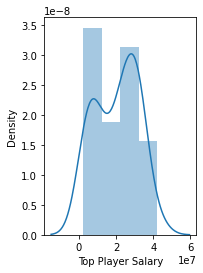

In [393]:
# Plot distribution plots of Highest Payroll, Lowest Payroll and Top Player Salary to look for any anamolies in the data
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_BB_columns['Highest Team Payroll'])
plt.subplot(1,2,2)
sns.distplot(df_BB_columns['Lowest Team Payroll'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(df_BB_columns['Top Player Salary'])
plt.show()
# The below histograms do not show any outliers (isolated bars) outside of where most of the bars are clustering, 
# so there are no values remarkably higher or lower than most other values.

## Find duplicates

In [394]:
df_BB_columns[df_BB_columns.duplicated(keep=False)]
# There are no duplicates in the dataset

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
